In [1]:
!pip install scikit-plot

In [2]:

import pandas as pd
import numpy as np
import gdown
import os

# To improve the speed of setting up, retrieve only the files for the two groups used in training
# Swap with the line below to get the entire dataset as a zip file
# gdown.download('https://drive.google.com/uc?id=1-QTtycxsVNeym17zrMBSZCAAtEZEs05p', '/content/miniimagenet.zip', quiet=False)
gdown.download('https://drive.google.com/uc?id=1CZeMPRt4OZGJL_xQNfgi5evJW1PpA77l', '/content/miniimagenet.zip', quiet=False) # selected groups only
images_directory = '/content/miniimagenet/images/'
if not os.path.exists(images_directory):
  os.makedirs(images_directory) 
!unzip /content/miniimagenet.zip -d {images_directory}


# get the CSV with the list of all file names
mini_imagenet_file_list_csv = '/content/all_imagenet_file_names.csv'
gdown.download('https://drive.google.com/uc?id=1-1JiyyEC6JlnEi0H0x-JKIGEKjdI_Nea', mini_imagenet_file_list_csv, quiet=False)
file_list = pd.read_csv(mini_imagenet_file_list_csv)

selected_groups = ['n01532829', 'n01558993']
samples_miniimagenet = file_list[file_list['label'].isin(selected_groups)].groupby('label').first()

# Other options for group pairs
# n01532829, n01558993
# n02108551, n02108915


Downloading...
From: https://drive.google.com/uc?id=1CZeMPRt4OZGJL_xQNfgi5evJW1PpA77l
To: /content/miniimagenet.zip
59.8MB [00:00, 83.8MB/s]


Archive:  /content/miniimagenet.zip
  inflating: /content/miniimagenet/images/n0155899300000838.jpg  
  inflating: /content/miniimagenet/images/n0155899300000844.jpg  
  inflating: /content/miniimagenet/images/n0155899300000847.jpg  
  inflating: /content/miniimagenet/images/n0155899300000849.jpg  
  inflating: /content/miniimagenet/images/n0155899300000852.jpg  
  inflating: /content/miniimagenet/images/n0155899300000853.jpg  
  inflating: /content/miniimagenet/images/n0155899300000854.jpg  
  inflating: /content/miniimagenet/images/n0155899300000859.jpg  
  inflating: /content/miniimagenet/images/n0155899300000861.jpg  
  inflating: /content/miniimagenet/images/n0155899300000864.jpg  
  inflating: /content/miniimagenet/images/n0155899300000865.jpg  
  inflating: /content/miniimagenet/images/n0155899300000866.jpg  
  inflating: /content/miniimagenet/images/n0155899300000869.jpg  
  inflating: /content/miniimagenet/images/n0155899300000871.jpg  
  inflating: /content/miniimagenet/image

Downloading...
From: https://drive.google.com/uc?id=1-1JiyyEC6JlnEi0H0x-JKIGEKjdI_Nea
To: /content/all_imagenet_file_names.csv
2.27MB [00:00, 92.6MB/s]


In [3]:
# create train and test sets
# Use EEG of Sz for testing
# Extract files from an eeg_grp2 spectrogram directory where files are saved by subject

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


rand_seed = 1

grp1_file_ids = [f for f in os.listdir(images_directory) if f.startswith(selected_groups[0])] 
grp2_file_ids = [f for f in os.listdir(images_directory) if f.startswith(selected_groups[1])] 
#train_grp1, test_grp1 = train_test_split(hc_subject_ids, test_size=0.2, random_state=rand_seed)
#train_grp2, test_grp2 = train_test_split(sz_subject_ids, test_size=0.2, random_state=rand_seed)

train_grp1, validate_grp1 = train_test_split(grp1_file_ids, test_size=0.2, random_state=rand_seed)
train_grp2, validate_grp2 = train_test_split(grp2_file_ids, test_size=0.2, random_state=rand_seed)
train_grp1, test_grp1 = train_test_split(train_grp1, test_size=0.25, random_state=rand_seed)
train_grp2, test_grp2 = train_test_split(train_grp2, test_size=0.25, random_state=rand_seed)

train_ids = np.concatenate([train_grp1, train_grp2])
validate_ids = np.concatenate([validate_grp1, validate_grp2])
test_ids = np.concatenate([test_grp1, test_grp2])
  

from shutil import copyfile
import pandas as pd
import os 


    
def gen_csv_and_copy_grp2_files(file_ids, image_dir, img_output_dir):
    subdir_data = []
    for file in file_ids: # by participant IDs
        group = file[:9] # the first nine chars in the file name
        file_data = {'filename': file, 'label': group}
        subdir_data.append(file_data)
        copyfile(image_dir  + file, img_output_dir + '/' + group + '/' + file )
    return pd.DataFrame(subdir_data)



mini_train_directory = 'mini_all_train_images'
mini_test_directory = 'mini_all_test_images'
mini_val_directory = 'mini_all_validation_images'
mini_all_images_directory = '/content/miniimagenet/images/'
groups = selected_groups

if not os.path.exists(mini_train_directory):
    os.makedirs(mini_train_directory + '/' + groups[0])
    os.makedirs(mini_train_directory + '/' + groups[1])

if not os.path.exists(mini_test_directory):
    os.makedirs(mini_test_directory + '/' + groups[0])
    os.makedirs(mini_test_directory + '/' + groups[1])


if not os.path.exists(mini_val_directory):
    os.makedirs(mini_val_directory + '/' + groups[0])
    os.makedirs(mini_val_directory + '/' + groups[1])

train_df = gen_csv_and_copy_grp2_files(train_ids, image_dir=mini_all_images_directory, 
                                img_output_dir=mini_train_directory)
test_df = gen_csv_and_copy_grp2_files(validate_ids, image_dir=mini_all_images_directory, 
                                img_output_dir=mini_test_directory)
validation_df = gen_csv_and_copy_grp2_files(test_ids, image_dir=mini_all_images_directory, 
                                img_output_dir=mini_val_directory)
print(test_df.head())



                filename      label
0  n0153282900000779.jpg  n01532829
1  n0153282900000158.jpg  n01532829
2  n0153282900001008.jpg  n01532829
3  n0153282900001055.jpg  n01532829
4  n0153282900000633.jpg  n01532829


In [4]:
train_df['label'].unique()

array(['n01532829', 'n01558993'], dtype=object)

In [5]:
"""# create train and test sets by placing files in train and test directories
# Extract files from an eeg_sz spectrogram directory where files are saved by subject
%cd /content

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


rand_seed = 1
# List of raw patient file IDs that should be skipped based on categorization as outliers
ignore_list = ['h09', 'h10', 's10', 's11', 's12']

hc_subject_ids = ['hc' + str(i) for i in range(14) if "h{:02}".format(i) not in ignore_list] 
sz_subject_ids = ['sz' + str(i) for i in range(14) if "s{:02}".format(i) not in ignore_list] 
all_subject_ids = np.concatenate([hc_subject_ids, sz_subject_ids], axis=0)
#train_hc, test_hc = train_test_split(hc_subject_ids, test_size=0.2, random_state=rand_seed)
#train_sz, test_sz = train_test_split(sz_subject_ids, test_size=0.2, random_state=rand_seed)

train_hc, validate_hc = train_test_split(hc_subject_ids, test_size=0.2, random_state=rand_seed)
train_sz, validate_sz = train_test_split(sz_subject_ids, test_size=0.2, random_state=rand_seed)
train_hc, test_hc = train_test_split(train_hc, test_size=0.25, random_state=rand_seed)
train_sz, test_sz = train_test_split(train_sz, test_size=0.25, random_state=rand_seed)

train_ids = np.concatenate([train_hc, train_sz])
val_ids = np.concatenate([validate_hc, validate_sz])
test_ids = np.concatenate([test_hc, test_sz])
ids = { 'test': test_ids}

print('\nSubjects assigned to groups using train_test_split with seed=', rand_seed)
print('Train group: ', ", ".join(train_ids), "\n")
print('Validation group: ', ", ".join(val_ids), "\n")
print('Test group: ', ", ".join(test_ids), "\n")

  

from shutil import copyfile
import pandas as pd
import os 


    
def gen_csv_and_copy_sz_files(image_dir, img_output_dir, subdir, participant_ids, output_name):
    subdir_data = []
    for group in ['hc', 'sz']: #['Healthy_Control', 'Sz_Patient']:
        for pid in os.listdir(image_dir + '/' + group): # by participant IDs
            if pid in participant_ids:
              for file in os.listdir(image_dir + '/' + group + '/' + pid):
                file_data = {'filename': file, 'label': group}
                subdir_data.append(file_data)
                copyfile(image_dir + '/' + group + '/' + pid + '/' + file, img_output_dir + '/' + group + '/' + file )
    #pd.DataFrame(subdir_data).to_csv(img_output_dir + '/' + output_name)
    #print('Data saved to ', img_output_dir + '/' + output_name)
    return pd.DataFrame(subdir_data)



train_images_output_directory = 'all_train_images'
val_images_output_directory = 'all_validation_images'
test_images_output_directory = 'all_test_images'


if not os.path.exists(train_images_output_directory):
    os.makedirs(train_images_output_directory + '/' + 'hc')
    os.makedirs(train_images_output_directory + '/' + 'sz')

if not os.path.exists(val_images_output_directory):
    os.makedirs(val_images_output_directory + '/' + 'hc')
    os.makedirs(val_images_output_directory + '/' + 'sz')

if not os.path.exists(test_images_output_directory):
    os.makedirs(test_images_output_directory + '/' + 'hc')
    os.makedirs(test_images_output_directory + '/' + 'sz')



train_df = gen_csv_and_copy_sz_files(image_dir=eeg_image_directory, 
                                img_output_dir=train_images_output_directory,
                                subdir='train', 
                                participant_ids=train_ids, 
                                output_name= 'train.csv')
val_df = gen_csv_and_copy_sz_files(image_dir=eeg_image_directory, 
                                img_output_dir=val_images_output_directory,
                                subdir='val', 
                                participant_ids=val_ids, 
                                output_name= 'val.csv')
test_df = gen_csv_and_copy_sz_files(image_dir=eeg_image_directory, 
                                img_output_dir=test_images_output_directory,
                                subdir='test', 
                                participant_ids=test_ids, 
                                output_name= 'test.csv')
#print('\nSample from the test file')
#print(test_df.head())

"""

'# create train and test sets by placing files in train and test directories\n# Extract files from an eeg_sz spectrogram directory where files are saved by subject\n%cd /content\n\nimport numpy as np\nimport pandas as pd\nfrom sklearn.model_selection import train_test_split\n\n\nrand_seed = 1\n# List of raw patient file IDs that should be skipped based on categorization as outliers\nignore_list = [\'h09\', \'h10\', \'s10\', \'s11\', \'s12\']\n\nhc_subject_ids = [\'hc\' + str(i) for i in range(14) if "h{:02}".format(i) not in ignore_list] \nsz_subject_ids = [\'sz\' + str(i) for i in range(14) if "s{:02}".format(i) not in ignore_list] \nall_subject_ids = np.concatenate([hc_subject_ids, sz_subject_ids], axis=0)\n#train_hc, test_hc = train_test_split(hc_subject_ids, test_size=0.2, random_state=rand_seed)\n#train_sz, test_sz = train_test_split(sz_subject_ids, test_size=0.2, random_state=rand_seed)\n\ntrain_hc, validate_hc = train_test_split(hc_subject_ids, test_size=0.2, random_state=rand_s

In [6]:
%cd /content

#!git clone https://github.com/zhangrong1722/CheXNet-Pytorch.git binaryCNN

gdown.download('https://drive.google.com/uc?id=1TKqBlg7bzFV9kljftUgJVmiDcyXSxJ-Y', 'main.py', quiet=False) 

train_directory = '/content/mini_all_train_images'
test_directory = '/content/mini_all_test_images'
validation_directory = '/content/mini_all_validation_images'


/content


Downloading...
From: https://drive.google.com/uc?id=1TKqBlg7bzFV9kljftUgJVmiDcyXSxJ-Y
To: /content/main.py
100%|██████████| 16.1k/16.1k [00:00<00:00, 12.1MB/s]


In [16]:
!python main.py  --train_dir {train_directory}  --validation_dir {validation_directory}  --test_dir {test_directory} --epochs 300


Data loading complete.
Train directory:  /content/mini_all_train_images
Validation directory:  /content/mini_all_test_images
Test directory:  /content/mini_all_test_images
Batch size:  10
Length of train loader:  72
Length of validation loader:  24
Length of test loader:  24
Class names:  n01532829, n01558993
----------
/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
Epoch 1/300
----------
Train Epoch: 1 [0/720 (0%)]	Loss: 0.783637
Train Epoch: 1 [120/720 (17%)]	Loss: 0.894855
Train Epoch: 1 

In [15]:
import matplotlib.pyplot as plt
import itertools
import scikitplot as skplt

# modified from main.py https://github.com/zhangrong1722/CheXNet-Pytorch

def plt_roc(test_y, probas_y, plot_micro=False, plot_macro=False):
    assert isinstance(test_y, list) and isinstance(probas_y, list), 'the type of input must be list'
    skplt.metrics.plot_roc(test_y, probas_y, plot_micro=plot_micro, plot_macro=plot_macro)
    plt.savefig('roc_auc_curve.png')
    plt.show()
    plt.close()


def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    refence:
        http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

     
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.xticks([], [])
    plt.yticks([], [])
    plt.title('Confusion matrix ')
    plt.colorbar()
    normalize=True
    thresh = cm.max() / 1.5
    fmt = '.2f' if normalize else 'd'
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.locator_params(nbins=2)
    plt.tight_layout()
    

    plt.show()


In [17]:
best_model_preds = pd.read_csv('best_val_model_predictions.csv')
pred_y = best_model_preds['pred_y'].values
test_y = best_model_preds['test_y'].values
probas_y = [s.replace('[', '').replace(']', '').split(', ') for s in best_model_preds['probas_y'].values]
probas_y = [[float(t[0]), float(t[1])] for t in probas_y]

Confusion matrix, without normalization
[[88 33]
 [32 87]]


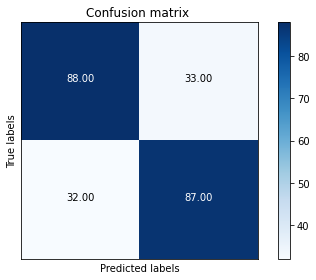

In [18]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(pred_y, test_y)
plot_confusion_matrix(confusion,
                      classes=['hc', 'sz'],
                      title='Confusion matrix')


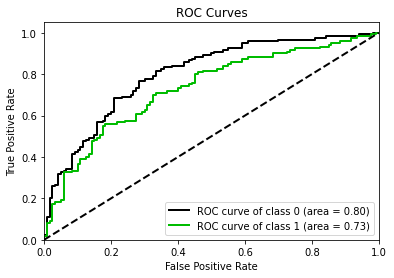

In [19]:
plt_roc(list(test_y), list(probas_y))

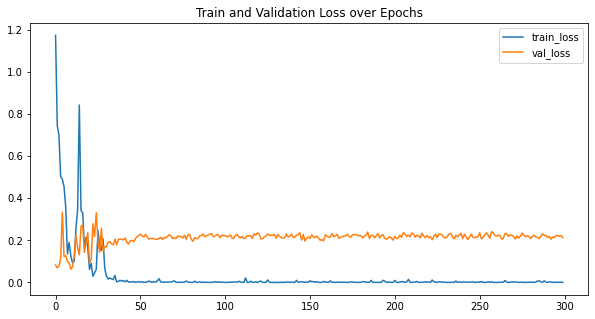

In [20]:
metrics = pd.read_csv('metrics_by_epoch.csv')
metrics.head()
#TODO chart these values

metrics[['train_loss', 'val_loss']].plot(figsize=(10,5), title='Train and Validation Loss over Epochs')

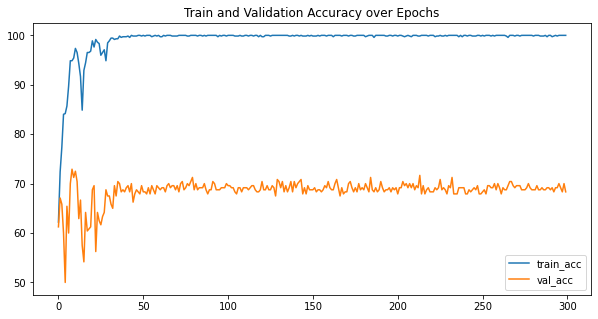

In [21]:
metrics[['train_acc', 'val_acc']].plot(figsize=(10,5), title='Train and Validation Accuracy over Epochs')